In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Version of the libraries used
print('\n'.join(f'{m.__name__} - {m.__version__}'
                for m in globals().values()
                if getattr(m, '__version__', None)))

pandas - 2.2.1
seaborn - 0.13.2


---

In [3]:
# Load data
metadata = pd.read_csv('../classic_data/articles_metadata.csv')
click_sample = pd.read_csv('../classic_data/clicks_sample.csv')

In [4]:
metadata

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


In [5]:
metadata.isna().sum()

article_id       0
category_id      0
created_at_ts    0
publisher_id     0
words_count      0
dtype: int64

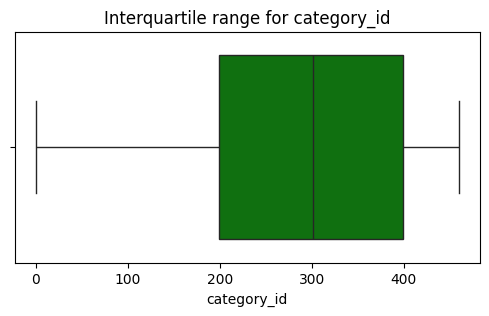

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=metadata['category_id'], color='green')
plt.title('Interquartile range for category_id')
plt.show()

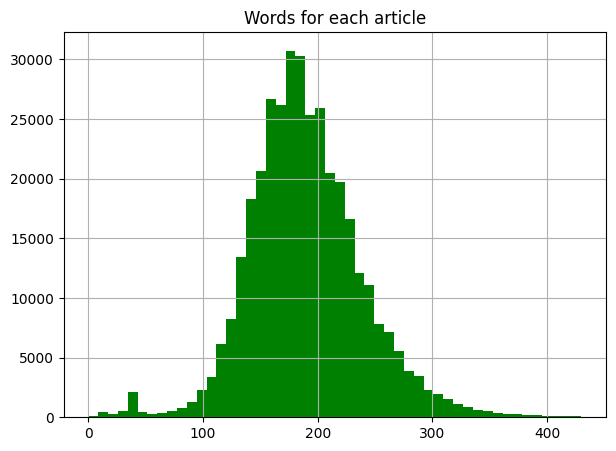

In [7]:
plt.figure(figsize=(7, 5))
metadata['words_count'].hist(bins=50, range=(0,430), color='green')
plt.title('Words for each article')
plt.show()

In [8]:
click_sample

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,705,1506828968165442,1506828968000,2,119592,1506830912301,4,1,17,1,21,2
1879,705,1506828968165442,1506828968000,2,284847,1506830942301,4,1,17,1,21,2
1880,706,1506828979881443,1506828979000,3,108854,1506829027334,4,3,2,1,25,1
1881,706,1506828979881443,1506828979000,3,96663,1506829095732,4,3,2,1,25,1


In [9]:
click_sample.isna().sum()

user_id                0
session_id             0
session_start          0
session_size           0
click_article_id       0
click_timestamp        0
click_environment      0
click_deviceGroup      0
click_os               0
click_country          0
click_region           0
click_referrer_type    0
dtype: int64

In [10]:
click_sample['session_size'].value_counts()

session_size
2     904
3     489
4     168
5     140
6      48
7      42
8      24
24     24
9      18
16     16
10     10
Name: count, dtype: int64

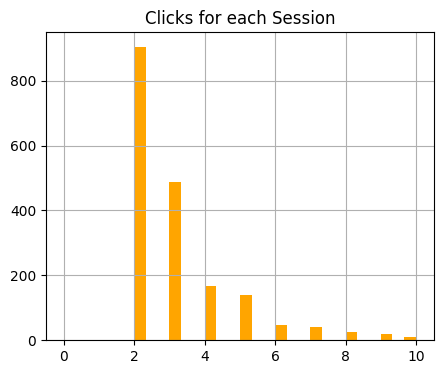

In [11]:
plt.figure(figsize=(5,4))
click_sample['session_size'].hist(bins=30, range=(0,10), color='orange')
plt.title('Clicks for each Session');
plt.show()

In [14]:
click_sample_info = click_sample[['user_id', 'click_article_id']]
click_sample_info

,user_id,click_article_id
0,0,157541
1,0,68866
2,1,235840
3,1,96663
4,2,119592
...,...,...
1878,705,119592
1879,705,284847
1880,706,108854
1881,706,96663


In [15]:
click_sample_info.to_csv('../click_sample_info.csv', index=False)